In [1]:
import numpy as np 
import pandas as pd
import math 
import csv
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
iterations = 40
k = 20
regularization_factor = 0.1 #𝜆
learning_rate = 0.01 # 𝜂
data_path ="ratings.csv"

In [3]:
max_movie =0
max_user =0
with open('ratings.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        c = row
        d = int(c[0])
        e= int(c[1])
        if (d>max_movie):
            max_movie =d 
        if(e>max_user):
            max_user = e
print(max_movie)
print(max_user)
    

9723
609


In [44]:

def latent_factor_recommnder(data_path, regularization_factor, learning_rate, iterations, k):
    cost_lfm = []
    p = np.random.uniform(low=0, high= math.sqrt(5/k), size=(max_user+1,k))
    q = np.random.uniform(low=0, high= math.sqrt(5/k), size=(max_movie+1,k))
    for u in range(iterations):
        print("iterations no : "+str(u))
        #print(p.shape)
        #print(q.shape)
        with open('ratings.csv') as csv_file:
            csv_reader = csv.reader(csv_file)
            
            for row in csv_reader:
                rrr = row
            
                movie_id = int(rrr[0])
                #print(movie_id)
                user_id = int(rrr[1])
                rating = int(rrr[2])
             
                der_err = 2*(rating - np.dot(q[movie_id],np.transpose(p[user_id])))
                q[movie_id] += (learning_rate*(der_err*p[user_id] - 2*(regularization_factor*q[movie_id])))
                p[user_id] += (learning_rate*(der_err*q[movie_id] - 2*(regularization_factor*p[user_id])))
                
                #csv_file.close()
                
        Er=0        
        with open('ratings.csv') as csv1_file:
            csv_reader = csv.reader(csv1_file)
            for row1 in csv_reader:
                rrr1 = row1
                
                
                movie_id1 = int(rrr1[0])
                user_id1 = int(rrr1[1])
                rating1 = int(rrr1[2])
                
                Er = Er+np.sum((rating1 - np.dot(q[movie_id1],np.transpose(p[user_id1])))**2)
    
        #print(p)
        #print(q)
        #print(Er)
        Erro = Er + (regularization_factor*(np.sum((LA.norm(p,2,axis=1))**2) + np.sum((LA.norm(q,2,axis=1))**2)))
                                        
    
        csv1_file.close()
        print(Erro)
        cost_lfm.append(Erro)
    return cost_lfm
        

In [47]:
lfm = latent_factor_recommnder(data_path,regularization_factor,learning_rate,iterations , k)

iterations no : 0
180415.99393491552
iterations no : 1
94561.63818579946
iterations no : 2
88735.06037250873
iterations no : 3
85947.1263621893
iterations no : 4
83885.76069058145
iterations no : 5
81979.14689621396
iterations no : 6
80011.47150632797
iterations no : 7
77916.4573751728
iterations no : 8
75722.28976298535
iterations no : 9
73504.26908699166
iterations no : 10
71336.63214746385
iterations no : 11
69268.54310167709
iterations no : 12
67325.13947471604
iterations no : 13
65516.38222008252
iterations no : 14
63843.68494427737
iterations no : 15
62303.46497073979
iterations no : 16
60889.0957274304
iterations no : 17
59592.19296478911
iterations no : 18
58403.551154262175
iterations no : 19
57313.81137096672
iterations no : 20
56313.90129039378
iterations no : 21
55395.29429366124
iterations no : 22
54550.13788792598
iterations no : 23
53771.29566729696
iterations no : 24
53052.33667956964
iterations no : 25
52387.49569650017
iterations no : 26
51771.61953518293
iterations n

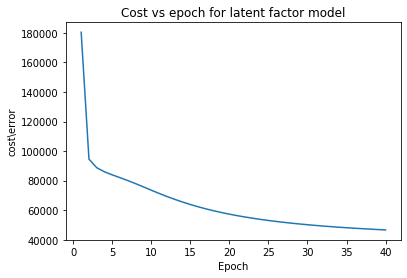

In [48]:
epochs= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','28','29','30','31','32','33','34','35','36','37','38','39','40']
plt.plot([i for i in range(1,41,1)],lfm)
plt.title('Cost vs epoch for latent factor model')
plt.ylabel('cost\error')
plt.xlabel('Epoch')

plt.show()